# More Customizations - Colors and Fills
This tutorial's material was taken from a series done by sentdex (YouTube channel) which I HIGHLY recommend watching for yourself. The code herein is not exact but represents what I needed to understand this module for my uses.

[Play list](https://www.youtube.com/playlist?list=PLQVvvaa0QuDfefDfXb9Yf0la1fPDKluPF)

This code is a direct copy from "basic_customizations-rotating_labels"

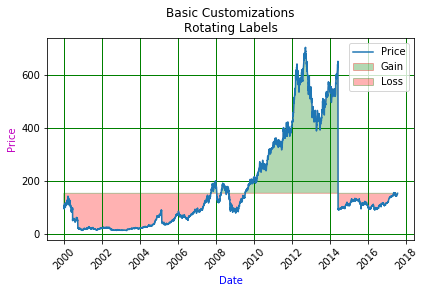

In [19]:
# NOTE: There were a couple other tutorials in the video series linked above that
# no longer work because they reference a dead API.  The code below is borrowed from
# https://pythonprogramming.net/basic-customization-matplotlib-tutorial (still from Sentdex)
# NOTE: The first line, "%matplotlib inline" is necessary only for the Jupyter notebook. You won't
# need it in a "regular" .py file.
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import urllib
import matplotlib.dates as mdates


def bytespdate2num(fmt, encoding='utf-8'):
    # fmt = format, pass in the desired format of the date stamp
    # Take in a date format, below you can see we're using
    # %Y = full year (2019)
    # %m = number month
    # %d = number day
    # %Y-%m-%d
    # Why can't mdates just do it for us? The best I can explain is that .decode(), used to get the data,
    # does not sufficiently decode the date for matplot lib to work with
    # Use mdates.strpdate2num (strip-date-to-number) to get a date based on the number
    strconverter = mdates.strpdate2num(fmt)
    # Instantiate a nested function
    def bytesconverter(b):
        # Convert b (bytes) to string based on encoding ('utf-8')
        s = b.decode(encoding)
        # return the string converter of s
        return strconverter(s)
    # Give the bytes converter to the caller
    return bytesconverter


def graph_data(stock):
    # Setup a graph for a given stock; pass in stock label I.e. 'TSLA' = Tesla

    # Figure exists by default (it's implied) but in order to modify it we must instantiate a reference to it
    fig = plt.figure()

    # This is creating a subplot - it is one of several
    # the first tuple is the "shape" of the grid (it's 1 x 1) and the second tuple is the starting point
    # here it is 0, 0.  Now we will plot to ax1 instead of plt.plot()
    ax1 = plt.subplot2grid((1, 1), (0, 0))

    # Yahoo's API (used in the original Sentdex video) is no loger available
    # the code below was supplied by Sentdex as a replacement (url in notes above)

    # Setup variable with target data, this example code (as far as I know) will only work with TSLA
    stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'

    # Use urllib to grab the data, read it into the variable and decode it (normally it's in bytes)
    source_code = urllib.request.urlopen(stock_price_url).read().decode()

    # The source is somewhat messy and has information we don't need so the next thing we do is "clean" the data
    # Setup list variable to put the lines of data into
    stock_data = []

    # Split the source on new lines ('\n')
    split_source = source_code.split('\n')
    for line in split_source[1:]:
        split_line = line.split(',')
        if len(split_line) == 7:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    # date, close price, high price, low price, open price, adjusted close price, and volume
    # are the values in each line
    # Converters takes in a dictionary where the key is the index of the element needing converting
    date, closep, highp, lowp, openp, adj_closep, volume = np.loadtxt(stock_data,
                                                                     delimiter=',',
                                                                     unpack=True,
                                                                     converters={0: bytespdate2num('%Y-%m-%d')})

    # Create the plot using the date and the closing price
    ax1.plot_date(date, closep, '-', label='Price')

    # Rotating the labels on the graph
    for label in ax1.xaxis.get_ticklabels():
        # Set the rotation in degrees - below we're rotating the labels 45 degrees
        label.set_rotation(45)

    # Adding a grid to the graph
    ax1.grid(True, color='g', linestyle='-', linewidth=1)
    
    # Adding color to the axis (this is for the label)
    ax1.xaxis.label.set_color('b')
    ax1.yaxis.label.set_color('m')
    # Specifying the y-axis "ticks"
    ax1.set_yticks([0, 200, 400, 600, 800])
    # Add a fill to the line (color everything below the line).  The parameters here are what we want to fill between.
    # On our graph, we're plotting the date across x (first argument) and the closed price, "closep", along y (second
    # argument), and a fixed point on y for the third argument, in the example below we chose 100 (imagine we bought
    # this stock at $100/share and want to track profit/loss).  The last argument you'll see is alpha which will effect
    # how opaque the shading is.
    # ax1.fill_between(date, closep, 100, alpha=0.3)
    # We can add some logic to fill as well, in the example below we're using the first value of closed price.
    # Further specification is given in the "where" argument; here we're stating that we would only like to see
    # fill applied where the price is higher than our initial price.
    ax1.fill_between(date, closep, closep[0], where=(closep > closep[0]), facecolor='g', edgecolor='r', alpha=0.3,
                    label='Gain')
    
    ax1.fill_between(date, closep, closep[0], where=(closep < closep[0]), facecolor='r', edgecolor='g', alpha=0.3,
                    label='Loss')
    
    # These can be left as-is for this scenario
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Basic Customizations\nRotating Labels')
    plt.legend()
    # this is adjusting the white space around the graph (makes more sense in the windowed version,
    # I.e. running from Python interpretor installed on your machine)
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    
graph_data('TSLA')